In [1]:
#!/usr/bin/python3

#Imports
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
from IPython.display import Image
import re

In [2]:
# Load Lawful Permanent Residents 2020 Data Tables
# Data from: https://www.dhs.gov/immigration-statistics/yearbook/2020
directory = "./data/lawful2020/"

# Title: PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020
lawful2020_table1_in = pd.read_excel(directory + "fy2020_table1.xlsx", skiprows=3, nrows=60)

# Reformat into 2 columns: Year and Number
lawful2020_table1 = pd.DataFrame(columns=['Year', 'Number'])
lawful2020_table1['Year'] = lawful2020_table1_in['Year']
lawful2020_table1['Number'] = lawful2020_table1_in['Number']
for i in range(3):
    temp = pd.DataFrame(columns=['Year','Number'])
    current_col_year = 'Year.' + str(i + 1)
    current_col_number = 'Number.' + str(i + 1)
    temp['Year'] = lawful2020_table1_in[current_col_year]
    temp['Number'] = lawful2020_table1_in[current_col_number]
    lawful2020_table1 = pd.concat([lawful2020_table1, temp])
    
# Remove rows with NaN
lawful2020_table1 = lawful2020_table1.dropna()

# Modify one instance of a string
lawful2020_table1.loc[lawful2020_table1['Year'] == "1976¹"] = 1976

print(lawful2020_table1.describe())

             Number
count  2.010000e+02
mean   4.288578e+05
std    3.651173e+05
min    1.976000e+03
25%    1.411320e+05
50%    3.216250e+05
75%    6.033220e+05
max    1.826595e+06


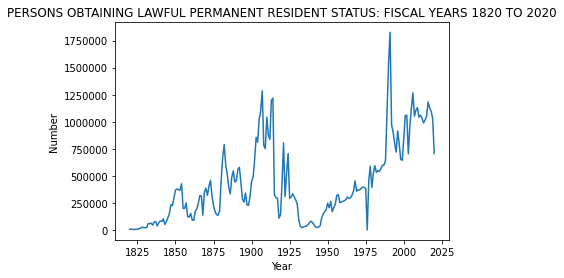

In [3]:
# Plot simple chart
plt.plot(lawful2020_table1['Year'], lawful2020_table1['Number'])
plt.xlabel("Year")
plt.ylabel("Number")
plt.title("PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020")
plt.ticklabel_format(style='plain')
plt.show()

Here, we can see a general upward trend for persons obtaining lawful permanent resident status over the past 200 years in the United States.

In [4]:
# Load Lawful Permanent Residents 2020 Supplementary Data Tables

# Title: PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020
lawful2020_table2_in = pd.read_excel(directory + "fy2020_table2.xlsx", skiprows=3, nrows=88)
df = lawful2020_table2_in

# Make sure all column names are strings (2020 label saved as int)
df = df.rename(columns={2020:'2020'})

# Rename a column
df = df.rename(columns={"Region and country of last residence1": "Region"})

# Rename a row element
df.iloc[87]['Region'] = 'Not Specified'

# Replace NaN with 0, replace dashes with 0
df = df.fillna(0)
df.loc[:, df.columns != 'Region'] = df.loc[:, df.columns != 'Region'].replace('-',0, regex=True)

# Combine 2010-2019 and 2020 columns
df['2010 to 2020'] = df['2010 to 2019'] + df['2020']

# Remove a column
df = df.drop('2010 to 2019', axis=1)
df = df.drop('2020', axis=1)

print(df.head())

               Region 1820 to 1829 1830 to 1839 1840 to 1849 1850 to 1859  \
0               Total       128502       538381      1427337      2814554   
1              Europe        99618       422853      1369423      2622617   
2  Austria-Hungary2,3            0            0            0            0   
3          Austria2,3            0            0            0            0   
4          Hungary2,3            0            0            0            0   

  1860 to 1869 1870 to 1879 1880 to 1889 1890 to 1899 1900 to 1909  ...  \
0      2081261      2742137      5248568      3694294      8202388  ...   
1      1880389      2252050      4638684      3576411      7572569  ...   
2         3375        60127       314787       534059      2001376  ...   
3         2700        54529       204805       268218       532416  ...   
4          483         5598       109982       203350       685567  ...   

  1920 to 1929 1930 to 1939 1940 to 1949 1950 to 1959 1960 to 1969  \
0      4295510  

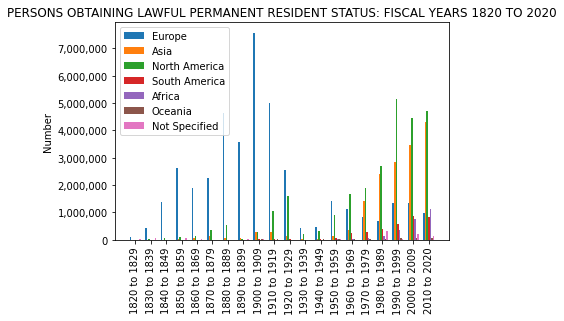

In [5]:
# Create plot of persons by continent

continent_data = df[(df['Region'] == 'Europe') | (df['Region'] == 'Asia') | (df['Region'] == 'America') | (df['Region'] == 'South America') | (df['Region'] == 'Africa') | (df['Region'] == 'Oceania') | (df['Region'] == 'Not Specified')]

labels = continent_data.iloc[:, 0].tolist()
europe_data = continent_data.iloc[0,1:].tolist()
asia_data = continent_data.iloc[1,1:].tolist()
america_data = continent_data.iloc[2,1:].tolist()
sa_data = continent_data.iloc[3,1:].tolist()
africa_data = continent_data.iloc[4,1:].tolist()
oceania_data = continent_data.iloc[5,1:].tolist()
other_data = continent_data.iloc[6,1:].tolist()

bar_labels = continent_data.columns.tolist()
bar_labels = bar_labels[1:]

x = np.arange(len(europe_data))
width = 0.1
fig, ax = plt.subplots()

europe_bars = ax.bar((x - (3 * width)), europe_data, width, label='Europe')
asia_bars = ax.bar((x - (2 * width)), asia_data, width, label='Asia')
america_bars = ax.bar((x - (1 * width)), america_data, width, label='North America')
sa_bars = ax.bar(x, sa_data, width, label='South America')
africa_bars = ax.bar((x + (1 * width)), africa_data, width, label='Africa')
oceania_bars = ax.bar((x + (2 * width)), oceania_data, width, label='Oceania')
other_bars = ax.bar((x + (3 * width)), other_data, width, label='Not Specified')

ax.set_xticks(x, bar_labels, rotation='vertical')
ax.set_ylabel('Number')
ax.set_title('PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020')
ax.legend()

ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, a: format(int(x), ',')))

plt.show()


You'll have to zoom in to properly see the bars, but we can see general immigration trends by continent over the past 200 years.

# Below: Visualization for Deliverable 3

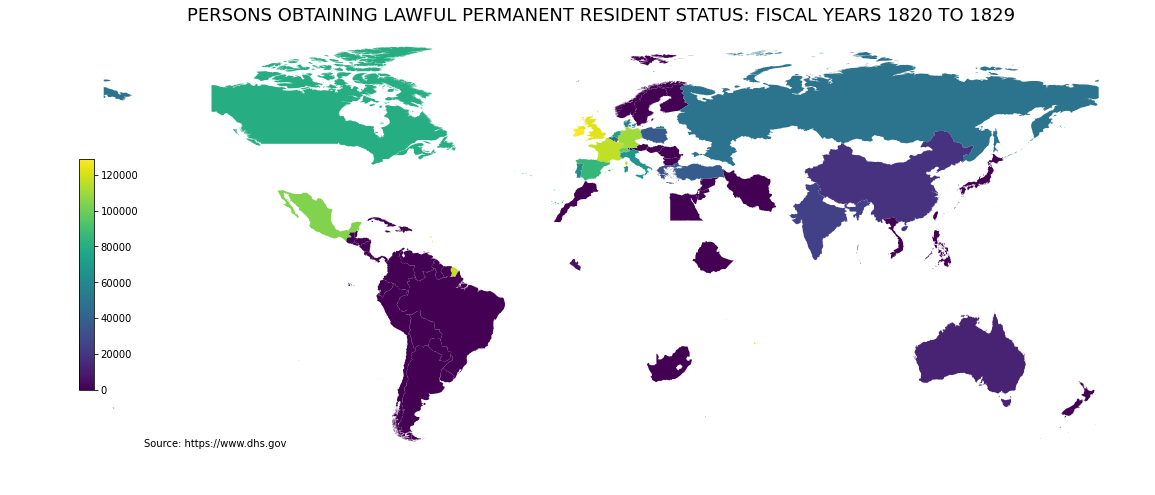

In [49]:
# Time-lapse of immigrants by country over time

# Re-create plot of persons by continent (from earlier in the code)
# Obtain countries shapefile
countries_file = './data/worldmap/ne_10m_admin_0_countries.shp'

# Read shapefile using Geopandas
geo_df = gpd.read_file(countries_file)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns
geo_df.columns = ['country', 'country_code', 'geometry']

# Remove Antarctica
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)

# Copy df for use here
df_globe_plot = df

# Remove any rows with null in "Region" column
df_globe_plot = df_globe_plot.dropna(axis=0, subset=['Region'])

# Remove spaces, digits, commas from column Region in order to plot
df_globe_plot['Region'] = df_globe_plot['Region'].map(lambda x: x.strip())

# regex for digits, commas
digits = '[0-9,]'
df_globe_plot['Region'] = df_globe_plot['Region'].map(lambda x: re.sub(digits, '', x))

# Remove regions that we don't need, we only need countries
# Also remove countries that no longer exist
remove_regions = ["Total", "Austria-Hungary", "Czechoslovakia", "Norway-Sweden", "Yugoslavia", "Europe",
                      "Other Europe", "Asia", "Other Asia", "America", "Other Caribbean", "Central America",
                      "Other Central America", "South America", "Other South America", "Other America",
                      "Other Africa", "Oceania", "Other Oceania", "Not Specified"]
for region in remove_regions:
    df_globe_plot.drop(df_globe_plot.index[df_globe_plot['Region'] == region], inplace=True)
    
# Rename regions to use with world data
df_globe_plot['Region'].replace("Canada and Newfoundland", "Canada", inplace=True)

# Combine dataset with geo dataset
merged_df = pd.merge(left=df_globe_plot, right=geo_df, how='left', left_on='Region', right_on='country')

# TODO: Make it so countries with no data are not removed from the map...

merged_df = gpd.GeoDataFrame(merged_df)

# Create info for plot
title = 'PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 1829'
# cols = ['1820 to 1829', '1830 to 1839', '1840 to 1849', '1850 to 1859', '1860 to 1869', '1870 to 1879',
#            '1880 to 1889', '1890 to 1899', '1900 to 1909', '1910 to 1919', '1920 to 1929', '1930 to 1939',
#            '1940 to 1949', '1950 to 1959', '1960 to 1969', '1970 to 1979', '1980 to 1989', '1990 to 1999', 
#            '2000 to 2009', '2010 to 2020']
y = "1820 to 1829"
source = 'Source: https://www.dhs.gov'
val_min = df[y].min()
val_max = df[y].max()
theme = 'viridis'

# Create plot
fig, ax = plt.subplots(1, figsize=(20, 8))

ax.axis('off')
merged_df.plot(column=y, ax=ax, cmap=theme)
ax.set_title(title, fontdict={'fontsize': '18', 'fontweight': '3'})

# Source annotation
ax.annotate(source, xy=(0.1, .08), fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
                xycoords='figure fraction')
            
# Colorbar
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=val_min, vmax=val_max), cmap=theme)
sm._A = []
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

In [6]:
# Data from: https://data.census.gov/cedsci/table?q=nationality&tid=ACSDP5Y2020.DP02

           Ancestry      Number Margin of Error Percent  \
0          American  19,364,103         ±65,490    5.9%   
1              Arab   2,056,594         ±27,520    0.6%   
2             Czech   1,329,130         ±11,870    0.4%   
3            Danish   1,244,498         ±12,074    0.4%   
4             Dutch   3,692,889         ±18,347    1.1%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

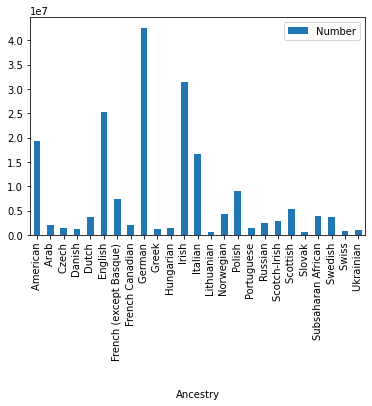

In [7]:
# Load ancestry census data from 2020

# Import correct sheet in file
df_2020_5 = pd.read_csv('./data/5yr/2020_5yr.csv', skiprows=141, nrows = 25)
df_2020_5.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
print(df_2020_5.head())
labels_2020 = df_2020_5['Ancestry'][1:]
population_data_2020_5 = df_2020_5['Number'][1:]
df_2020_5.replace(',','', regex=True, inplace=True)
df_2020_5['Number'] = df_2020_5['Number'].astype(int)
df_2020_5.plot(x="Ancestry", y=["Number"], kind="bar")

           Ancestry      Number Margin of Error Percent  \
0          American  20,266,321         ±62,729    6.2%   
1              Arab   2,009,626         ±28,918    0.6%   
2             Czech   1,358,610          ±9,400    0.4%   
3            Danish   1,265,727         ±10,337    0.4%   
4             Dutch   3,872,651         ±18,708    1.2%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

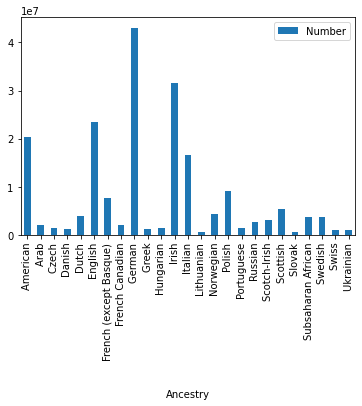

In [8]:
# Load ancestry census data from 2019

# Import correct sheet in file
df_2019_5 = pd.read_csv('./data/5yr/2019_5yr.csv', skiprows=140, nrows = 25)
df_2019_5.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
print(df_2019_5.head())
labels_2019_5 = df_2019_5['Ancestry'][1:]
population_data_2019_5 = df_2019_5['Number'][1:]
df_2019_5.replace(',','', regex=True, inplace=True)
df_2019_5['Number'] = df_2019_5['Number'].astype(int)
df_2019_5.plot(x="Ancestry", y=["Number"], kind="bar")

           Ancestry      Number Margin of Error Percent  \
0          American  20,678,613         ±60,777    6.4%   
1              Arab   1,979,363         ±26,183    0.6%   
2             Czech   1,382,835          ±9,921    0.4%   
3            Danish   1,278,457          ±9,713    0.4%   
4             Dutch   4,009,279         ±19,942    1.2%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

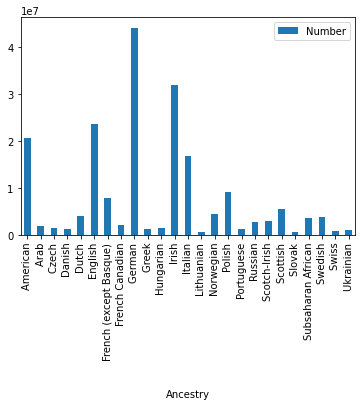

In [9]:
# Load ancestry census data from 2018


# Import correct sheet in file
df_2018_5 = pd.read_csv('./data/5yr/2018_5yr.csv', skiprows=139, nrows = 25)
df_2018_5.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names

print(df_2018_5.head())
labels_2018 = df_2018_5['Ancestry'][1:]
population_data_2018_5 = df_2018_5['Number'][1:]
df_2018_5.replace(',','', regex=True, inplace=True)
df_2018_5['Number'] = df_2018_5['Number'].astype(int)
df_2018_5.plot(x="Ancestry", y=["Number"], kind="bar")


           Ancestry      Number Margin of Error Percent  \
0          American  21,227,906         ±54,727    6.6%   
1              Arab   1,920,562         ±26,249    0.6%   
2             Czech   1,410,576          ±9,770    0.4%   
3            Danish   1,294,689         ±10,692    0.4%   
4             Dutch   4,121,110         ±18,904    1.3%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

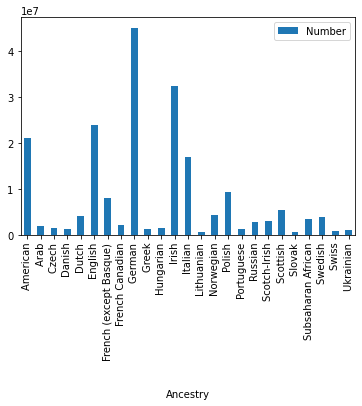

In [10]:
# Load ancestry census data from 2017


# Import correct sheet in file
df_2017_5 = pd.read_csv('./data/5yr/2017_5yr.csv', skiprows=139, nrows = 25)
df_2017_5.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names

print(df_2017_5.head())
labels_2017 = df_2017_5['Ancestry'][1:]
population_data_2017_5 = df_2017_5['Number'][1:]
df_2017_5.replace(',','', regex=True, inplace=True)
df_2017_5['Number'] = df_2017_5['Number'].astype(int)
df_2017_5.plot(x="Ancestry", y=["Number"], kind="bar")


           Ancestry      Number Margin of Error Percent  \
0          American  21,961,129         ±59,333    6.9%   
1              Arab   1,883,456         ±23,581    0.6%   
2             Czech   1,435,359          ±8,933    0.5%   
3            Danish   1,297,738         ±11,493    0.4%   
4             Dutch   4,210,787         ±18,159    1.3%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

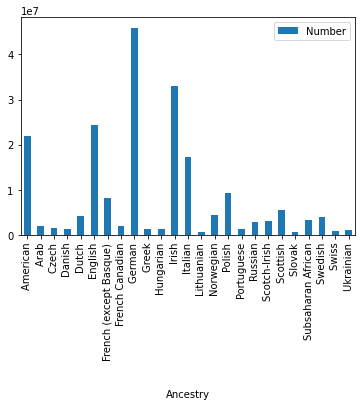

In [121]:
# Load ancestry census data from 2016


# Import correct sheet in file
df_2016_5 = pd.read_csv('./data/5yr/2016_5yr.csv', skiprows=139, nrows = 25)
df_2016_5.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
print(df_2016_5.head())
labels_2016_5 = df_2016_5['Ancestry'][1:]
population_data_2016_5 = df_2016_5['Number'][1:]
df_2016_5.replace(',','', regex=True, inplace=True)
df_2016_5['Number'] = df_2016_5['Number'].astype(int)
df_2016_5.plot(x="Ancestry", y=["Number"], kind="bar")

           Ancestry      Number Margin of Error Percent  \
0          American  22,746,991         ±50,437    7.2%   
1              Arab   1,832,106         ±23,840    0.6%   
2             Czech   1,452,344         ±10,370    0.5%   
3            Danish   1,307,381          ±9,289    0.4%   
4             Dutch   4,289,116         ±17,121    1.4%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

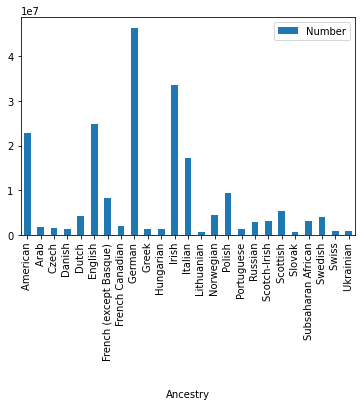

In [122]:
# Load ancestry census data from 2015


# Import correct sheet in file
df_2015_5 = pd.read_csv('./data/5yr/2015_5yr.csv', skiprows=139, nrows = 25)
df_2015_5.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
print(df_2015_5.head())
labels_2015_5 = df_2015_5['Ancestry'][1:]
population_data_2015_5 = df_2015_5['Number'][1:]
df_2015_5.replace(',','', regex=True, inplace=True)
df_2015_5['Number'] = df_2015_5['Number'].astype(int)
df_2015_5.plot(x="Ancestry", y=["Number"], kind="bar")


           Ancestry      Number Margin of Error Percent  \
0          American  22,365,250         ±53,443    7.1%   
1              Arab   1,769,645         ±20,573    0.6%   
2             Czech   1,479,588         ±11,823    0.5%   
3            Danish   1,323,182         ±10,809    0.4%   
4             Dutch   4,387,814         ±18,649    1.4%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

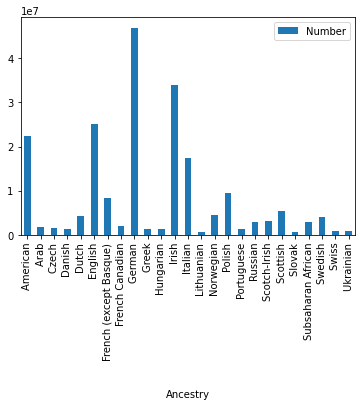

In [123]:
# Load ancestry census data from 2014


# Import correct sheet in file
df_2014_5 = pd.read_csv('./data/5yr/2014_5yr.csv', skiprows=139, nrows = 25)
df_2014_5.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
print(df_2014_5.head())
labels_2014_5 = df_2014_5['Ancestry'][1:]
population_data_2014_5 = df_2014_5['Number'][1:]
df_2014_5.replace(',','', regex=True, inplace=True)
df_2014_5['Number'] = df_2014_5['Number'].astype(int)
df_2014_5.plot(x="Ancestry", y=["Number"], kind="bar")

           Ancestry      Number Margin of Error Percent  \
0          American  21,659,006         ±42,199    7.0%   
1              Arab   1,710,927         ±19,118    0.5%   
2             Czech   1,514,919         ±11,653    0.5%   
3            Danish   1,360,858         ±10,385    0.4%   
4             Dutch   4,533,617         ±17,674    1.5%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

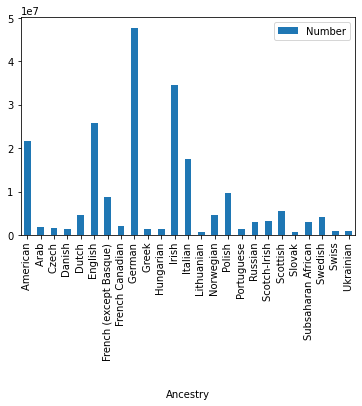

In [124]:
# Load ancestry census data from 2013

# Import correct sheet in file
df_2013_5 = pd.read_csv('./data/5yr/2013_5yr.csv', skiprows=139, nrows = 25)
df_2013_5.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

print(df_2013_5.head())
labels_2013 = df_2013_5['Ancestry'][1:]
population_data_2013_5 = df_2013_5['Number'][1:]
df_2013_5.replace(',','', regex=True, inplace=True)
df_2013_5['Number'] = df_2013_5['Number'].astype(int)
df_2013_5.plot(x="Ancestry", y=["Number"], kind="bar")


       Ancestry      Number Margin of Error Percent Percent Margin of Error
0      American  20,775,461         ±45,958    6.7%                    ±0.1
1          Arab   1,646,808         ±18,400    0.5%                    ±0.1
2         Czech   1,543,224         ±10,124    0.5%                    ±0.1
3        Danish   1,392,161         ±12,510    0.5%                    ±0.1
4         Dutch   4,665,736         ±18,344    1.5%                    ±0.1


<AxesSubplot:xlabel='Ancestry'>

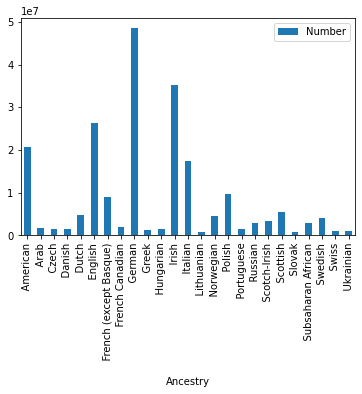

In [125]:
# Load ancestry census data from 2012


# Import correct sheet in file
df_2012_5 = pd.read_csv('./data/5yr/2012_5yr.csv', skiprows=139, nrows = 25)
df_2012_5.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']


print(df_2012_5.head())
labels_2012_5 = df_2012_5['Ancestry'][1:]
population_data_2012_5 = df_2012_5['Number'][1:]
df_2012_5.replace(',','', regex=True, inplace=True)
df_2012_5['Number'] = df_2012_5['Number'].astype(int)
df_2012_5.plot(x="Ancestry", y=["Number"], kind="bar")


       Ancestry      Number Margin of Error Percent Percent Margin of Error
0      American  19,911,467         ±47,204    6.5%                    ±0.1
1          Arab   1,584,874         ±19,442    0.5%                    ±0.1
2         Czech   1,569,839         ±11,579    0.5%                    ±0.1
3        Danish   1,420,962         ±10,652    0.5%                    ±0.1
4         Dutch   4,809,836         ±18,659    1.6%                    ±0.1


<AxesSubplot:xlabel='Ancestry'>

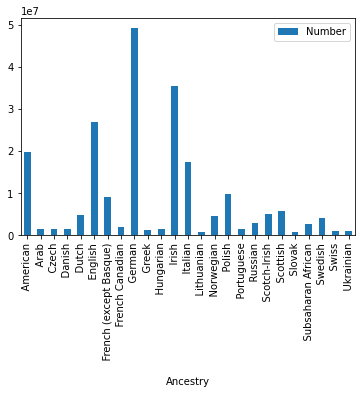

In [126]:
# Load ancestry census data from 2011

# Import correct sheet in file
df_2011_5 = pd.read_csv('./data/5yr/2011_5yr.csv', skiprows=139, nrows = 25)
df_2011_5.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']


print(df_2011_5.head())
labels_2011_5 = df_2011_5['Ancestry'][1:]
population_data_2011_5 = df_2011_5['Number'][1:]
df_2011_5.replace(',','', regex=True, inplace=True)
df_2011_5['Number'] = df_2011_5['Number'].astype(int)
df_2011_5.plot(x="Ancestry", y=["Number"], kind="bar")

       Ancestry      Number Margin of Error Percent Percent Margin of Error
0      American  19,094,109         ±43,520    6.3%                    ±0.1
1          Arab   1,517,664         ±17,397    0.5%                    ±0.1
2         Czech   1,595,844         ±11,247    0.5%                    ±0.1
3        Danish   1,453,897         ±10,251    0.5%                    ±0.1
4         Dutch   4,950,041         ±20,785    1.6%                    ±0.1


<AxesSubplot:xlabel='Ancestry'>

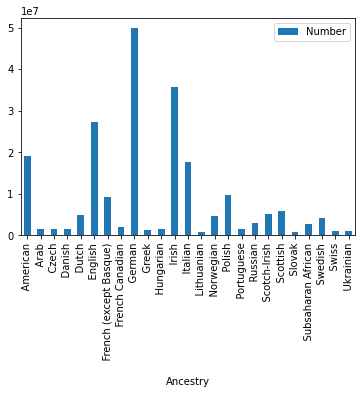

In [127]:
# Load ancestry census data from 2010

# Import correct sheet in file
df_2010_5 = pd.read_csv('./data/5yr/2010_5yr.csv', skiprows=139, nrows = 25)
df_2010_5.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

print(df_2010_5.head())
labels_2010_5 = df_2010_5['Ancestry'][1:]
population_data_2010_5 = df_2010_5['Number'][1:]
df_2010_5.replace(',','', regex=True, inplace=True)
df_2010_5['Number'] = df_2010_5['Number'].astype(int)
df_2010_5.plot(x="Ancestry", y=["Number"], kind="bar")



CREATE A DATAFRAME WITH COLUMNS FOR EACH YEAR AND ROWS FOR ORIGIN/ANCESTRY

In [128]:
df_joined_5 = pd.DataFrame()

In [129]:
df_joined_5['Ancestry'] = df_2020_5['Ancestry']
df_joined_5['N_2010'] = df_2010_5['Number']
df_joined_5['N_2011'] = df_2011_5['Number']
df_joined_5['N_2012'] = df_2012_5['Number']
df_joined_5['N_2013'] = df_2013_5['Number']
df_joined_5['N_2014'] = df_2014_5['Number']
df_joined_5['N_2015'] = df_2015_5['Number']
df_joined_5['N_2016'] = df_2016_5['Number']
df_joined_5['N_2017'] = df_2017_5['Number']
df_joined_5['N_2018'] = df_2018_5['Number']
df_joined_5['N_2019'] = df_2019_5['Number']
df_joined_5['N_2020'] = df_2020_5['Number']


In [138]:
df_joined_5

,Ancestry,N_2010,N_2011,N_2012,N_2013,N_2014,N_2015,N_2016,N_2017,N_2018,N_2019,N_2020
0,American,19094109,19911467,20775461,21659006,22365250,22746991,21961129,21227906,20678613,20266321,19364103
1,Arab,1517664,1584874,1646808,1710927,1769645,1832106,1883456,1920562,1979363,2009626,2056594
2,Czech,1595844,1569839,1543224,1514919,1479588,1452344,1435359,1410576,1382835,1358610,1329130
3,Danish,1453897,1420962,1392161,1360858,1323182,1307381,1297738,1294689,1278457,1265727,1244498
4,Dutch,4950041,4809836,4665736,4533617,4387814,4289116,4210787,4121110,4009279,3872651,3692889
5,English,27403063,26922124,26360639,25809471,25181294,24787018,24426623,23977180,23638645,23493906,25213619
6,French (except Basque),9326180,9135933,8902996,8678917,8431568,8272538,8151499,7997196,7815721,7606589,7374976
7,French Canadian,2138601,2087970,2052405,2061608,2052979,2059482,2084903,2109242,2095503,2074567,1998012
8,German,49836146,49202203,48478298,47715461,46874293,46403053,45879360,45153215,44164758,43038145,42589571
9,Greek,1337511,1319128,1308335,1300818,1285866,1284473,1282655,1272806,1273100,1265177,1249194


In [139]:
df_joined_5_T = df_joined_5.transpose()


In [140]:
df_joined_5_T = df_joined_5_T.rename(columns=df_joined_5_T.iloc[0])

In [141]:
df_joined_5_T.drop(index=df_joined_5_T.index[0], axis=0, inplace=True)


In [142]:
# ax = df_joined_T.plot.line()

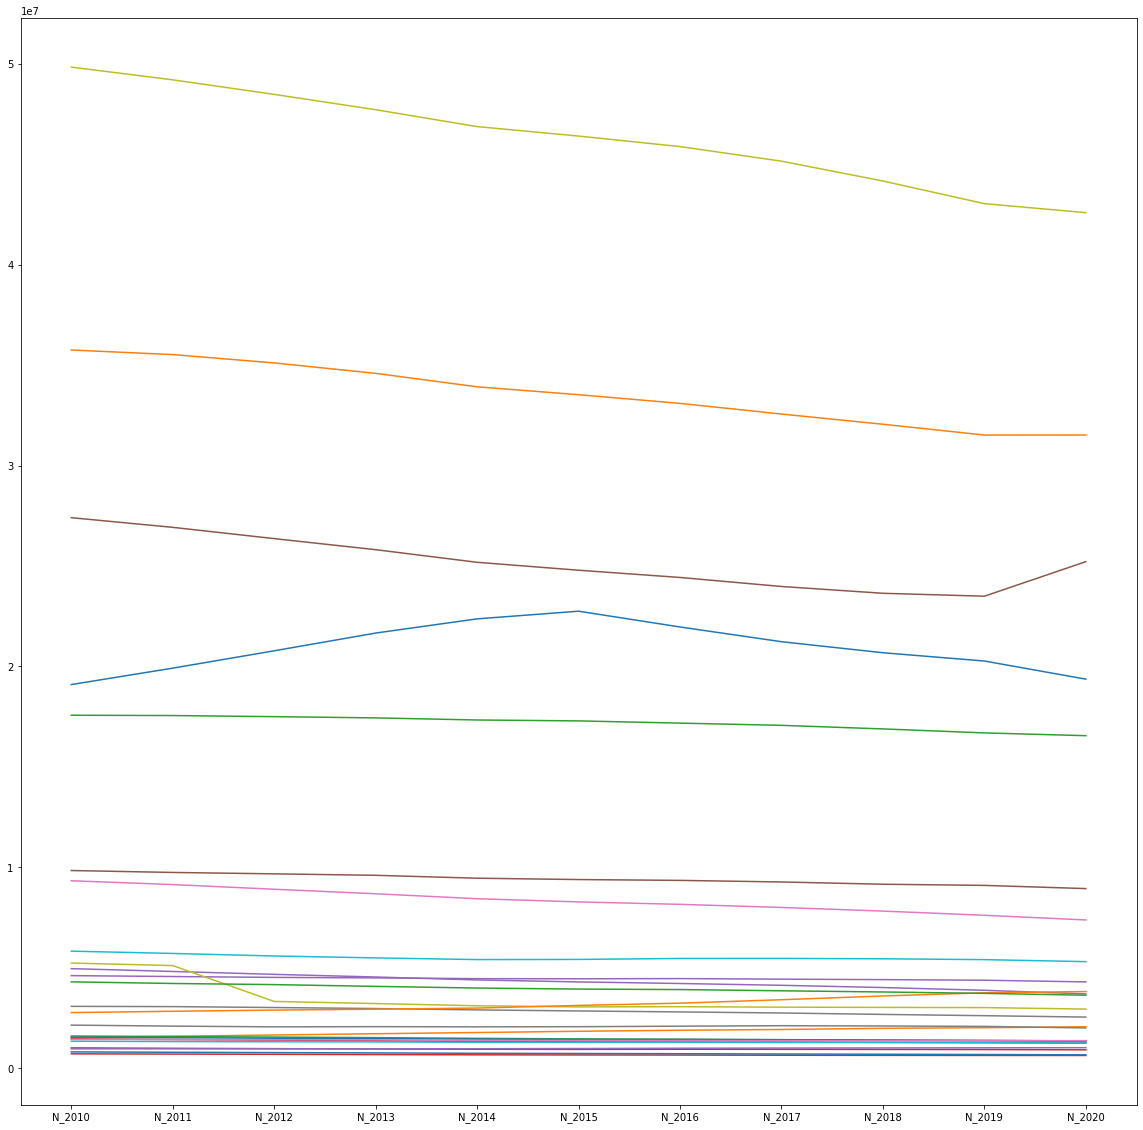

<Figure size 360x720 with 0 Axes>

In [143]:
fig = pylab.figure(figsize = (20,20))
figlegend = pylab.figure(figsize=(5,10))
ax = fig.add_subplot(111)
lines = ax.plot(df_joined_5_T)
figlegend.legend(lines, ('American', 'Arab','Czech','Danish','Dutch','English','French (except Basque)',
                         'French Canadian','German','Greek','Hungarian', 'Irish', 'Italian','Lithuanian',
                         'Norwegian','Polish','Portuguese','Russian','Scotch-Irish','Scottish','Slovak',
                         'Subsaharan African','Swedish','Swiss','Ukrainian'), 'center')

figlegend.savefig('legend.png')
fig.savefig('graph.png')


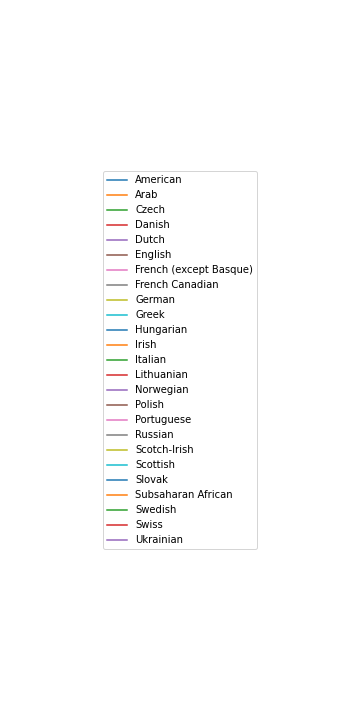

In [144]:
PATH = "/Users/Arnaud/Desktop/506_Project/Deliverable-2/"
#PATH = "/Users/luke/Documents/Code/CS506/Project/cs506-finalProject/Deliverable-2/"
Image(filename = PATH + "legend.png", width=500, height=500)

In [145]:
df_scaled_5 = pd.DataFrame(df_joined_5_T)

In [146]:
df_scaled_5.columns = df_scaled_5.columns.str.encode('ascii', 'ignore').str.decode('ascii')


In [148]:
df_scaled_5 = df_scaled_5.drop('American', 1)
df_scaled_5 = df_scaled_5.drop('German', 1)
df_scaled_5 = df_scaled_5.drop('Irish', 1)
df_scaled_5 = df_scaled_5.drop('English', 1)
df_scaled_5 = df_scaled_5.drop('Italian', 1)
df_scaled_5 = df_scaled_5.drop('Polish', 1)
df_scaled_5 = df_scaled_5.drop('French (except Basque)', 1)

/var/folders/wy/48s9t7fd0kvf15xjw_gbqgw40000gn/T/ipykernel_1340/945758763.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_scaled_5 = df_scaled_5.drop('American', 1)
/var/folders/wy/48s9t7fd0kvf15xjw_gbqgw40000gn/T/ipykernel_1340/945758763.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_scaled_5 = df_scaled_5.drop('German', 1)
/var/folders/wy/48s9t7fd0kvf15xjw_gbqgw40000gn/T/ipykernel_1340/945758763.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_scaled_5 = df_scaled_5.drop('Irish', 1)
/var/folders/wy/48s9t7fd0kvf15xjw_gbqgw40000gn/T/ipykernel_1340/945758763.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_scaled_5 = d

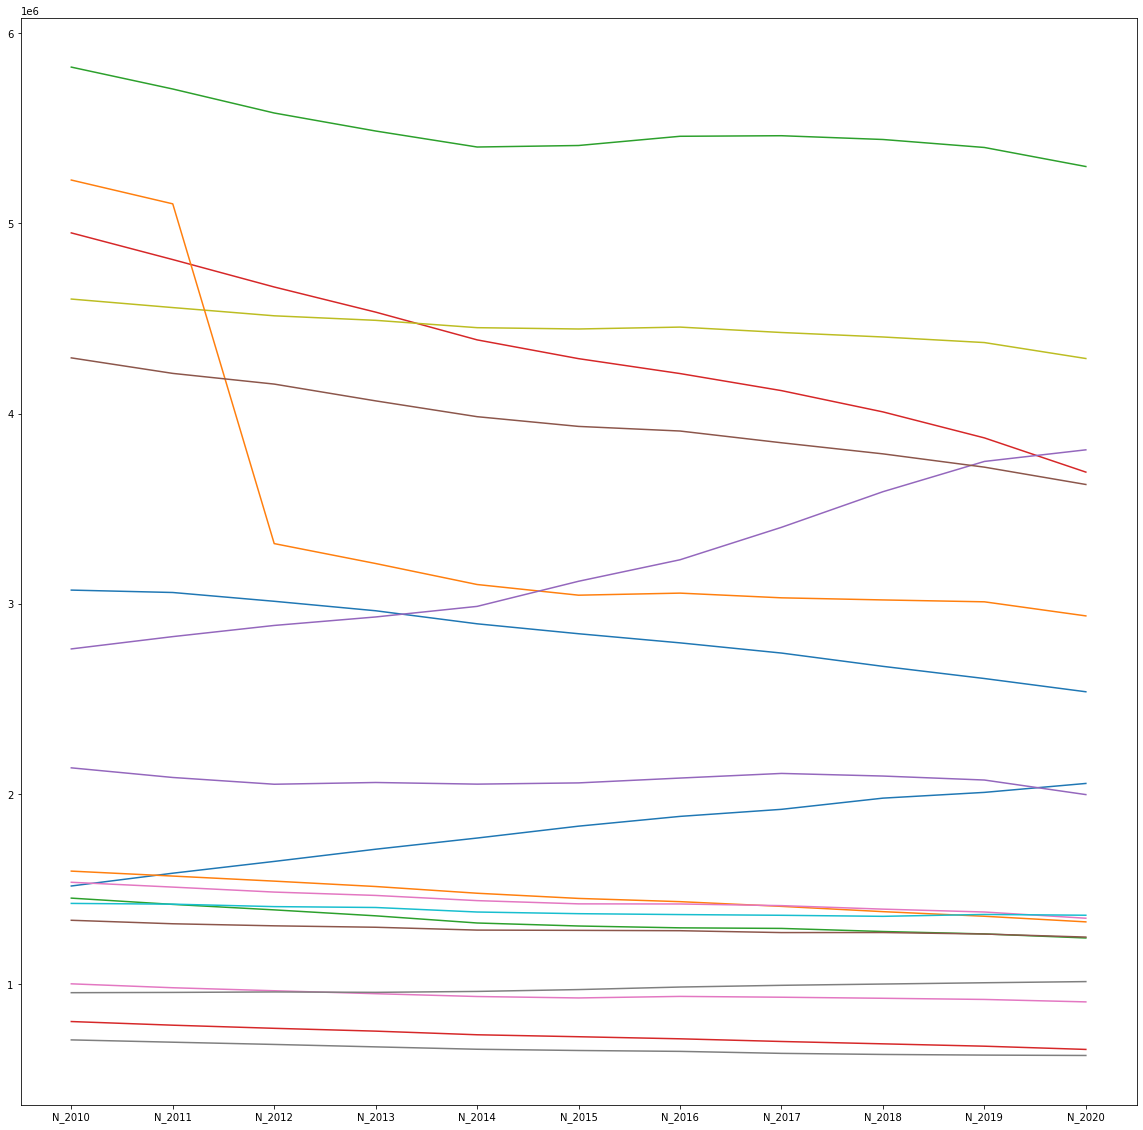

<Figure size 360x720 with 0 Axes>

In [150]:
fig_s = pylab.figure(figsize = (20,20))
figlegend_s = pylab.figure(figsize=(5,10))
ax_s = fig_s.add_subplot(111)
lines_s = ax_s.plot(df_scaled_5)
figlegend_s.legend(lines, ('Arab','Czech','Danish','Dutch',
                         'French Canadian','Greek','Hungarian','Lithuanian',
                         'Norwegian','Portuguese','Russian','Scotch-Irish','Scottish','Slovak',
                         'Subsaharan African','Swedish','Swiss','Ukrainian'), 'center')

figlegend_s.savefig('legend_s.png')
fig_s.savefig('graph_s.png')


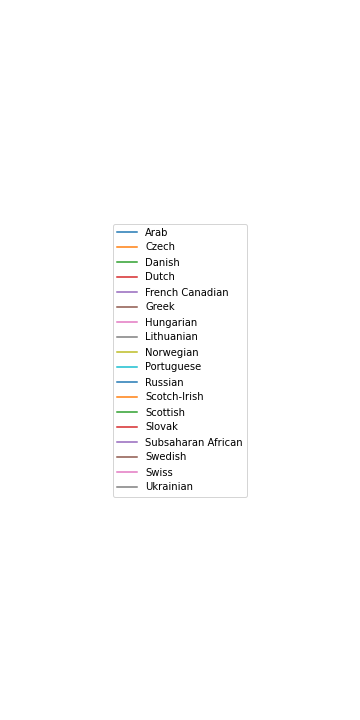

In [151]:
PATH = "/Users/Arnaud/Desktop/506_Project/Deliverable-2/"
#PATH = "/Users/luke/Documents/Code/CS506/Project/cs506-finalProject/Deliverable-2/"
Image(filename = PATH + "legend_s.png", width=500, height=500)

In [152]:
# Data from: https://data.census.gov/cedsci/table?t=Place%20of%20Birth&y=2000&tid=DECENNIALDPSF32000.DP2

df_2000 = pd.read_csv('./data/census2000/census2000.csv', skiprows=86, nrows = 27)
df_2000.columns=['Ancestry', 'Number', 'Percent']

# Fix row names
df_2000.loc[0, 'Ancestry'] = 'Czech'
df_2000.loc[4, 'Ancestry'] = 'French (except Basque)'
df_2000.loc[5, 'Ancestry'] = 'French Canadian'
df_2000.loc[9, 'Ancestry'] = 'Irish'
df_2000.loc[26, 'Ancestry'] = 'Other'

<AxesSubplot:xlabel='Ancestry'>

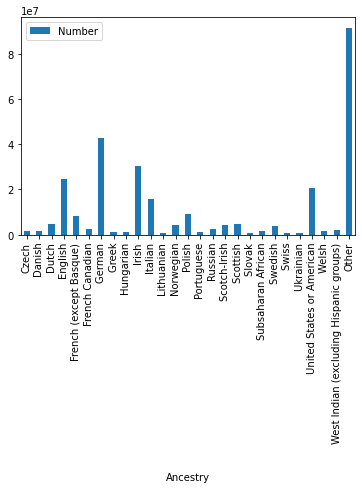

In [153]:
# Create bar chart
labels_2000 = df_2000['Ancestry']
population_data_2000 = df_2000['Number']
df_2000.replace(',','', regex=True, inplace=True)
df_2000['Number'] = df_2000['Number'].astype(int)
df_2000.plot(x="Ancestry", y=["Number"], kind="bar")

PLOTTING 1 YEAR CHARTS. PREVIOUS CHARTS WER 5 YEAR CHARTS

       Ancestry      Number Margin of Error Percent Percent Margin of Error
0      American  19,975,875        ±105,096    6.5%                    ±0.1
1          Arab   1,646,371         ±36,587    0.5%                    ±0.1
2         Czech   1,525,187         ±25,310    0.5%                    ±0.1
3        Danish   1,375,506         ±24,059    0.4%                    ±0.1
4         Dutch   4,645,131         ±40,097    1.5%                    ±0.1


<AxesSubplot:xlabel='Ancestry'>

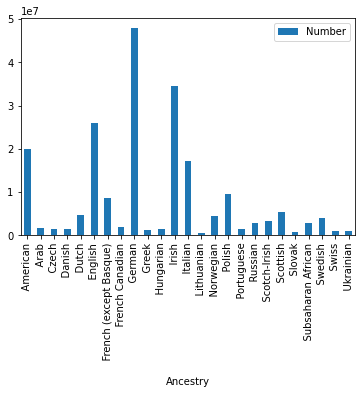

In [154]:
# Load ancestry census data from 2010 1yr

# Import correct sheet in file
df_2010_1 = pd.read_csv('./data/1yr/2010_1yr.csv', skiprows=139, nrows = 25)
df_2010_1.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

print(df_2010_1.head())
labels_2010_1 = df_2010_1['Ancestry'][1:]
population_data_2010_1 = df_2010_1['Number'][1:]
df_2010_1.replace(',','', regex=True, inplace=True)
df_2010_1['Number'] = df_2010_1['Number'].astype(int)
df_2010_1.plot(x="Ancestry", y=["Number"], kind="bar")

       Ancestry      Number Margin of Error Percent Percent Margin of Error
0      American  24,144,605        ±133,688    7.7%                    ±0.1
1          Arab   1,769,251         ±45,942    0.6%                    ±0.1
2         Czech   1,508,360         ±25,665    0.5%                    ±0.1
3        Danish   1,335,678         ±23,850    0.4%                    ±0.1
4         Dutch   4,440,324         ±46,128    1.4%                    ±0.1


<AxesSubplot:xlabel='Ancestry'>

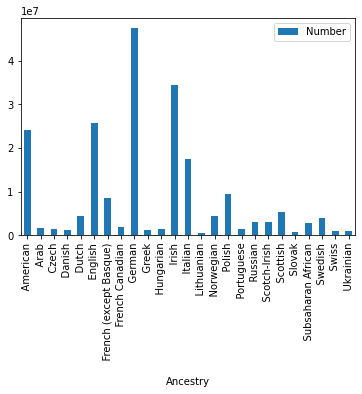

In [155]:
# Load ancestry census data from 2011 1yr

# Import correct sheet in file
df_2011_1 = pd.read_csv('./data/1yr/2011_1yr.csv', skiprows=139, nrows = 25)
df_2011_1.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

print(df_2011_1.head())
labels_2011 = df_2011_1['Ancestry'][1:]
population_data_2011_1 = df_2011_1['Number'][1:]
df_2011_1.replace(',','', regex=True, inplace=True)
df_2011_1['Number'] = df_2011_1['Number'].astype(int)
df_2011_1.plot(x="Ancestry", y=["Number"], kind="bar")

       Ancestry      Number Margin of Error Percent Percent Margin of Error
0      American  23,567,147         ±90,901    7.5%                    ±0.1
1          Arab   1,798,991         ±35,987    0.6%                    ±0.1
2         Czech   1,507,815         ±23,682    0.5%                    ±0.1
3        Danish   1,296,751         ±25,129    0.4%                    ±0.1
4         Dutch   4,350,633         ±43,932    1.4%                    ±0.1


<AxesSubplot:xlabel='Ancestry'>

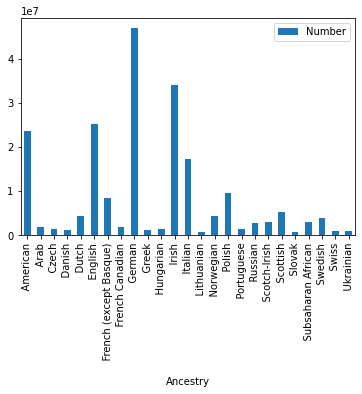

In [156]:
# Load ancestry census data from 2012 1yr

# Import correct sheet in file
df_2012_1 = pd.read_csv('./data/1yr/2012_1yr.csv', skiprows=139, nrows = 25)
df_2012_1.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

print(df_2012_1.head())
labels_2012 = df_2012_1['Ancestry'][1:]
population_data_2012_1 = df_2012_1['Number'][1:]
df_2012_1.replace(',','', regex=True, inplace=True)
df_2012_1['Number'] = df_2012_1['Number'].astype(int)
df_2012_1.plot(x="Ancestry", y=["Number"], kind="bar")

           Ancestry      Number Margin of Error Percent  \
0          American  22,217,931         ±99,019    7.0%   
1              Arab   1,822,511         ±43,443    0.6%   
2             Czech   1,441,072         ±22,429    0.5%   
3            Danish   1,311,484         ±23,055    0.4%   
4             Dutch   4,271,869         ±36,335    1.4%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

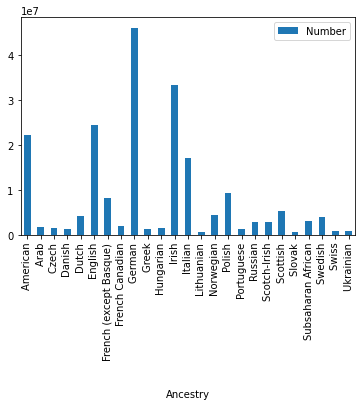

In [157]:
# Load ancestry census data from 2013 1yr

# Import correct sheet in file
df_2013_1 = pd.read_csv('./data/1yr/2013_1yr.csv', skiprows=139, nrows = 25)
df_2013_1.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

print(df_2013_1.head())
labels_2013_1 = df_2013_1['Ancestry'][1:]
population_data_2013_1 = df_2013_1['Number'][1:]
df_2013_1.replace(',','', regex=True, inplace=True)
df_2013_1['Number'] = df_2013_1['Number'].astype(int)
df_2013_1.plot(x="Ancestry", y=["Number"], kind="bar")

           Ancestry      Number Margin of Error Percent  \
0          American  22,097,012        ±105,421    6.9%   
1              Arab   1,927,432         ±47,667    0.6%   
2             Czech   1,419,630         ±25,737    0.4%   
3            Danish   1,275,222         ±23,810    0.4%   
4             Dutch   4,243,067         ±41,499    1.3%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

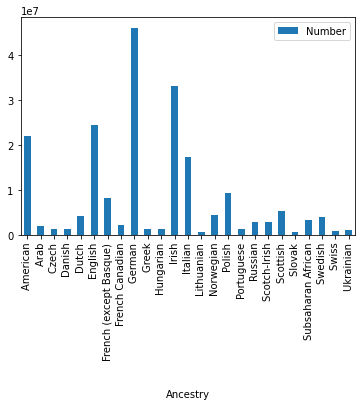

In [158]:
# Load ancestry census data from 2014 1yr

# Import correct sheet in file
df_2014_1 = pd.read_csv('./data/1yr/2014_1yr.csv', skiprows=139, nrows = 25)
df_2014_1.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

print(df_2014_1.head())
labels_2014_1 = df_2014_1['Ancestry'][1:]
population_data_2014_1 = df_2014_1['Number'][1:]
df_2014_1.replace(',','', regex=True, inplace=True)
df_2014_1['Number'] = df_2014_1['Number'].astype(int)
df_2014_1.plot(x="Ancestry", y=["Number"], kind="bar")

           Ancestry      Number Margin of Error Percent  \
0          American  21,844,951        ±114,000    6.8%   
1              Arab   1,963,478         ±37,039    0.6%   
2             Czech   1,391,020         ±24,359    0.4%   
3            Danish   1,315,302         ±18,683    0.4%   
4             Dutch   4,141,375         ±40,795    1.3%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

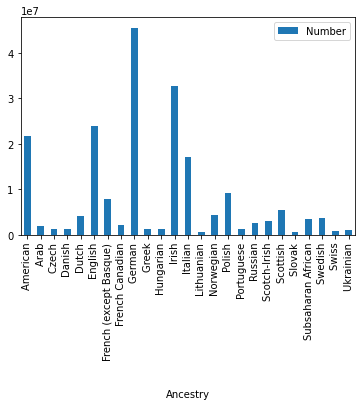

In [159]:
# Load ancestry census data from 2015 1yr

# Import correct sheet in file
df_2015_1 = pd.read_csv('./data/1yr/2015_1yr.csv', skiprows=139, nrows = 25)
df_2015_1.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

print(df_2015_1.head())
labels_2015_1 = df_2015_1['Ancestry'][1:]
population_data_2015_1 = df_2015_1['Number'][1:]
df_2015_1.replace(',','', regex=True, inplace=True)
df_2015_1['Number'] = df_2015_1['Number'].astype(int)
df_2015_1.plot(x="Ancestry", y=["Number"], kind="bar")

           Ancestry      Number Margin of Error Percent  \
0          American  20,151,829        ±112,100    6.2%   
1              Arab   2,032,892         ±44,267    0.6%   
2             Czech   1,412,051         ±22,079    0.4%   
3            Danish   1,295,169         ±22,160    0.4%   
4             Dutch   4,044,507         ±37,864    1.3%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

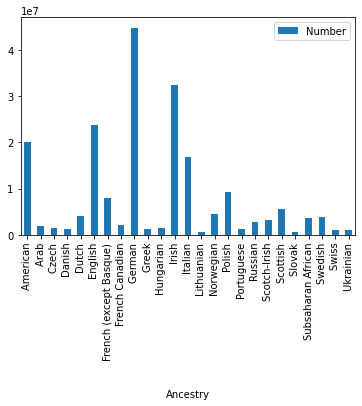

In [160]:
# Load ancestry census data from 2016 1yr

# Import correct sheet in file
df_2016_1 = pd.read_csv('./data/1yr/2016_1yr.csv', skiprows=139, nrows = 25)
df_2016_1.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

print(df_2016_1.head())
labels_2016_1 = df_2016_1['Ancestry'][1:]
population_data_2016_1 = df_2016_1['Number'][1:]
df_2016_1.replace(',','', regex=True, inplace=True)
df_2016_1['Number'] = df_2016_1['Number'].astype(int)
df_2016_1.plot(x="Ancestry", y=["Number"], kind="bar")

           Ancestry      Number Margin of Error Percent  \
0          American  20,024,830        ±114,083    6.1%   
1              Arab   2,005,223         ±48,033    0.6%   
2             Czech   1,379,037         ±22,004    0.4%   
3            Danish   1,284,171         ±25,886    0.4%   
4             Dutch   3,906,193         ±44,456    1.2%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

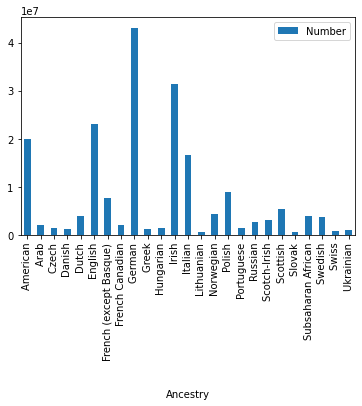

In [161]:
# Load ancestry census data from 2017 1yr

# Import correct sheet in file
df_2017_1 = pd.read_csv('./data/1yr/2017_1yr.csv', skiprows=139, nrows = 25)
df_2017_1.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

print(df_2017_1.head())
labels_2017_1 = df_2017_1['Ancestry'][1:]
population_data_2017_1 = df_2017_1['Number'][1:]
df_2017_1.replace(',','', regex=True, inplace=True)
df_2017_1['Number'] = df_2017_1['Number'].astype(int)
df_2017_1.plot(x="Ancestry", y=["Number"], kind="bar")

           Ancestry      Number Margin of Error Percent  \
0          American  19,613,477        ±110,027    6.0%   
1              Arab   2,110,727         ±43,587    0.6%   
2             Czech   1,298,652         ±24,916    0.4%   
3            Danish   1,220,506         ±19,786    0.4%   
4             Dutch   3,688,602         ±37,615    1.1%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

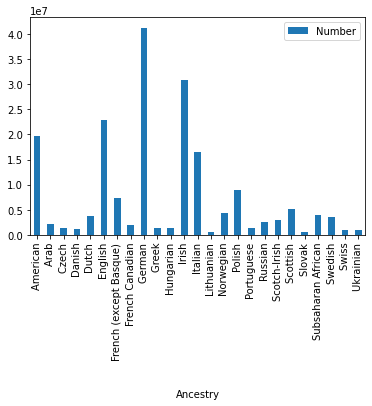

In [162]:
# Load ancestry census data from 2018 1yr

# Import correct sheet in file
df_2018_1 = pd.read_csv('./data/1yr/2018_1yr.csv', skiprows=139, nrows = 25)
df_2018_1.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

print(df_2018_1.head())
labels_2018_1 = df_2018_1['Ancestry'][1:]
population_data_2018_1 = df_2018_1['Number'][1:]
df_2018_1.replace(',','', regex=True, inplace=True)
df_2018_1['Number'] = df_2018_1['Number'].astype(int)
df_2018_1.plot(x="Ancestry", y=["Number"], kind="bar")

           Ancestry      Number Margin of Error Percent  \
0          American  20,071,406        ±128,105    6.1%   
1              Arab   2,097,642         ±44,681    0.6%   
2             Czech   1,294,789         ±23,187    0.4%   
3            Danish   1,215,809         ±22,120    0.4%   
4             Dutch   3,577,936         ±43,244    1.1%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

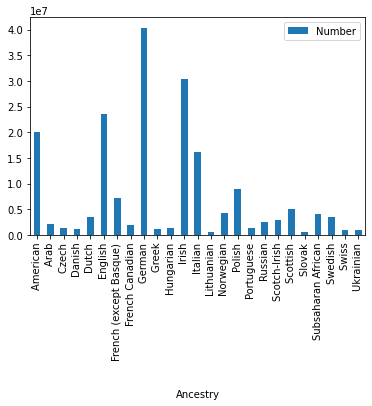

In [163]:
# Load ancestry census data from 2019 1yr

# Import correct sheet in file
df_2019_1 = pd.read_csv('./data/1yr/2019_1yr.csv', skiprows=140, nrows = 25)
df_2019_1.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

print(df_2019_1.head())
labels_2019_1 = df_2019_1['Ancestry'][1:]
population_data_2019_1 = df_2019_1['Number'][1:]
df_2019_1.replace(',','', regex=True, inplace=True)
df_2019_1['Number'] = df_2019_1['Number'].astype(int)
df_2019_1.plot(x="Ancestry", y=["Number"], kind="bar")

In [164]:
df_joined_1 = pd.DataFrame()

In [165]:
df_joined_1['Ancestry'] = df_2010['Ancestry']
df_joined_1['N_2010'] = df_2010_1['Number']
df_joined_1['N_2011'] = df_2011_1['Number']
df_joined_1['N_2012'] = df_2012_1['Number']
df_joined_1['N_2013'] = df_2013_1['Number']
df_joined_1['N_2014'] = df_2014_1['Number']
df_joined_1['N_2015'] = df_2015_1['Number']
df_joined_1['N_2016'] = df_2016_1['Number']
df_joined_1['N_2017'] = df_2017_1['Number']
df_joined_1['N_2018'] = df_2018_1['Number']
df_joined_1['N_2019'] = df_2019_1['Number']

In [166]:
df_joined_1_T = df_joined_1.transpose()
df_joined_1_T = df_joined_1_T.rename(columns=df_joined_1_T.iloc[0])
df_joined_1_T.drop(index=df_joined_1_T.index[0], axis=0, inplace=True)
df_joined_1_T

,American,Arab,Czech,Danish,Dutch,English,French (except Basque),French Canadian,German,Greek,...,Polish,Portuguese,Russian,Scotch-Irish,Scottish,Slovak,Subsaharan African,Swedish,Swiss,Ukrainian
N_2010,19975875,1646371,1525187,1375506,4645131,25926451,8761496,2042808,47901779,1315775,...,9569207,1405909,2971599,3257161,5460679,762030,2789129,4088555,961380,939746
N_2011,24144605,1769251,1508360,1335678,4440324,25695922,8595793,1971979,47383539,1280777,...,9447905,1379381,2994598,3143906,5412820,730373,2928281,4001651,916314,958470
N_2012,23567147,1798991,1507815,1296751,4350633,25261814,8475331,1992174,46875013,1296119,...,9500696,1380877,2895912,3117627,5379735,742738,3008961,3980614,941692,968769
N_2013,22217931,1822511,1441072,1311484,4271869,24483225,8227938,2100842,46162557,1265072,...,9383332,1373756,2844709,2976878,5310285,720203,3076544,3912522,917071,968754
N_2014,22097012,1927432,1419630,1275222,4243067,24382182,8153515,2099430,46047113,1295703,...,9249392,1340026,2762830,2978827,5365154,706662,3223885,3887273,939268,984157
N_2015,21844951,1963478,1391020,1315302,4141375,23959441,7969633,2072053,45526331,1280897,...,9231299,1373147,2723176,2981519,5510902,704601,3482384,3829029,915091,986698
N_2016,20151829,2032892,1412051,1295169,4044507,23835787,7962052,2120016,44754050,1278174,...,9258128,1375288,2754205,3212692,5658914,687243,3557902,3867110,957460,1028492
N_2017,20024830,2005223,1379037,1284171,3906193,23074947,7673619,2110014,43093766,1246095,...,9012085,1371701,2608412,3007722,5399371,670681,3893865,3683020,916404,1006636
N_2018,19613477,2110727,1298652,1220506,3688602,22807283,7275203,2032630,41222462,1284153,...,8887304,1334145,2502911,2933199,5212119,654642,4015406,3614939,900022,996884
N_2019,20071406,2097642,1294789,1215809,3577936,23593434,7116099,1994739,40363511,1247142,...,8969530,1371153,2432733,2924654,5131171,654150,4018144,3536320,905079,1009874


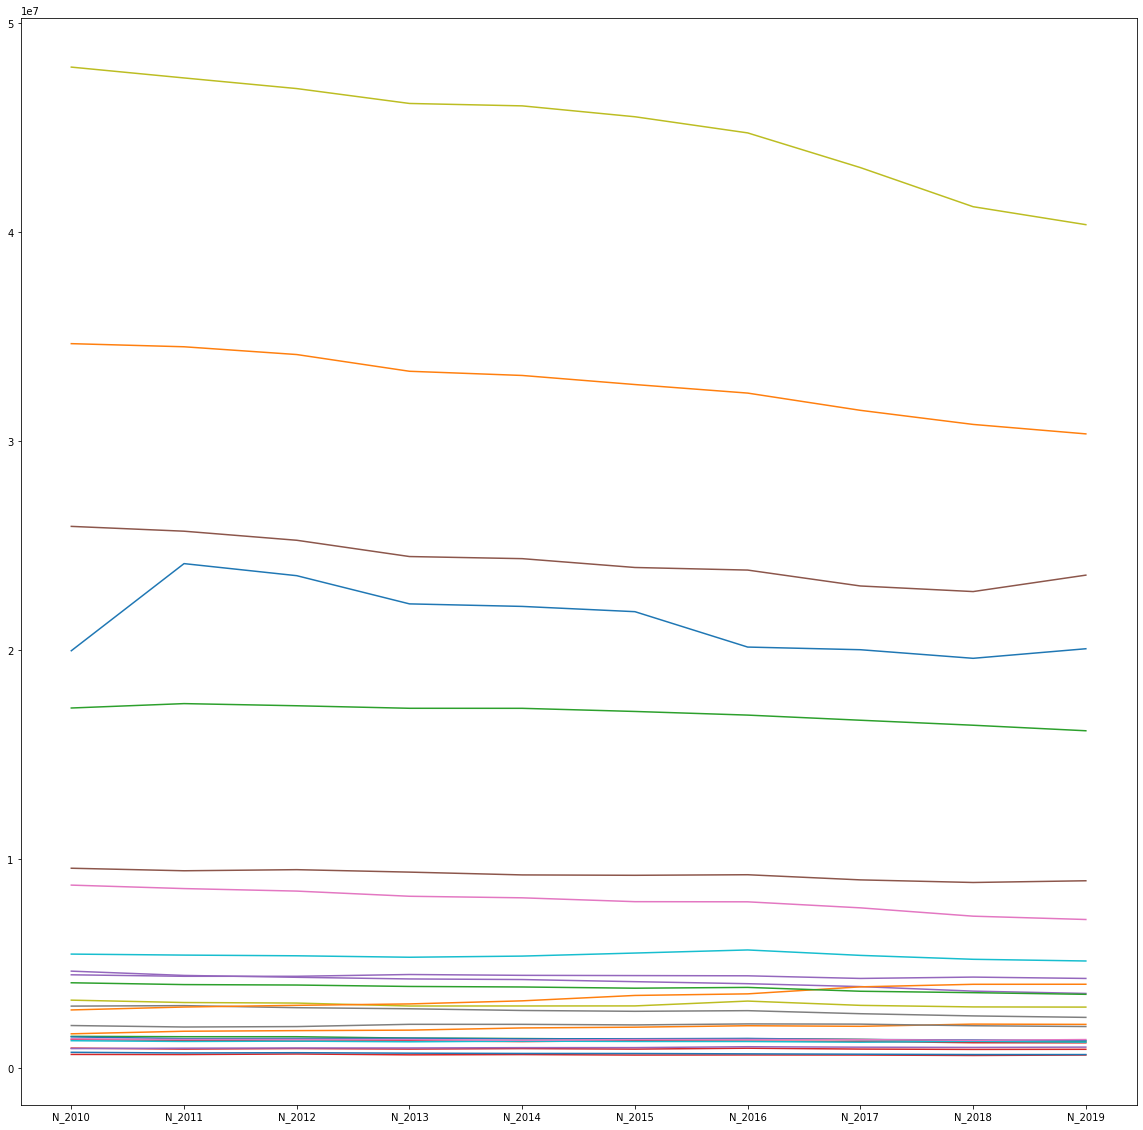

<Figure size 360x720 with 0 Axes>

In [167]:
fig = pylab.figure(figsize = (20,20))
figlegend = pylab.figure(figsize=(5,10))
ax = fig.add_subplot(111)
lines = ax.plot(df_joined_1_T)
figlegend.legend(lines, ('American', 'Arab','Czech','Danish','Dutch','English','French (except Basque)',
                         'French Canadian','German','Greek','Hungarian', 'Irish', 'Italian','Lithuanian',
                         'Norwegian','Polish','Portuguese','Russian','Scotch-Irish','Scottish','Slovak',
                         'Subsaharan African','Swedish','Swiss','Ukrainian'), 'center')

figlegend.savefig('legend_1.png')
fig.savefig('graph_1.png')

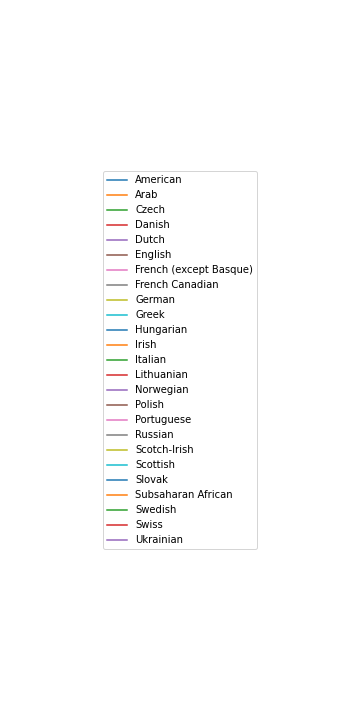

In [168]:
PATH = "/Users/Arnaud/Desktop/506_Project/Deliverable-2/"
#PATH = "/Users/luke/Documents/Code/CS506/Project/cs506-finalProject/Deliverable-2/"
Image(filename = PATH + "legend_1.png", width=500, height=500)


In [169]:
df_scaled_1 = pd.DataFrame(df_joined_1_T)
df_scaled_1.columns = df_scaled_1.columns.str.encode('ascii', 'ignore').str.decode('ascii')
df_scaled_1 = df_scaled_1.drop('American', 1)
df_scaled_1 = df_scaled_1.drop('German', 1)
df_scaled_1 = df_scaled_1.drop('Irish', 1)
df_scaled_1 = df_scaled_1.drop('English', 1)
df_scaled_1 = df_scaled_1.drop('Italian', 1)
df_scaled_1 = df_scaled_1.drop('Polish', 1)
df_scaled_1 = df_scaled_1.drop('French (except Basque)', 1)

/var/folders/wy/48s9t7fd0kvf15xjw_gbqgw40000gn/T/ipykernel_1340/88953560.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_scaled_1 = df_scaled_1.drop('American', 1)
/var/folders/wy/48s9t7fd0kvf15xjw_gbqgw40000gn/T/ipykernel_1340/88953560.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_scaled_1 = df_scaled_1.drop('German', 1)
/var/folders/wy/48s9t7fd0kvf15xjw_gbqgw40000gn/T/ipykernel_1340/88953560.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_scaled_1 = df_scaled_1.drop('Irish', 1)
/var/folders/wy/48s9t7fd0kvf15xjw_gbqgw40000gn/T/ipykernel_1340/88953560.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_scaled_1 = df_sc

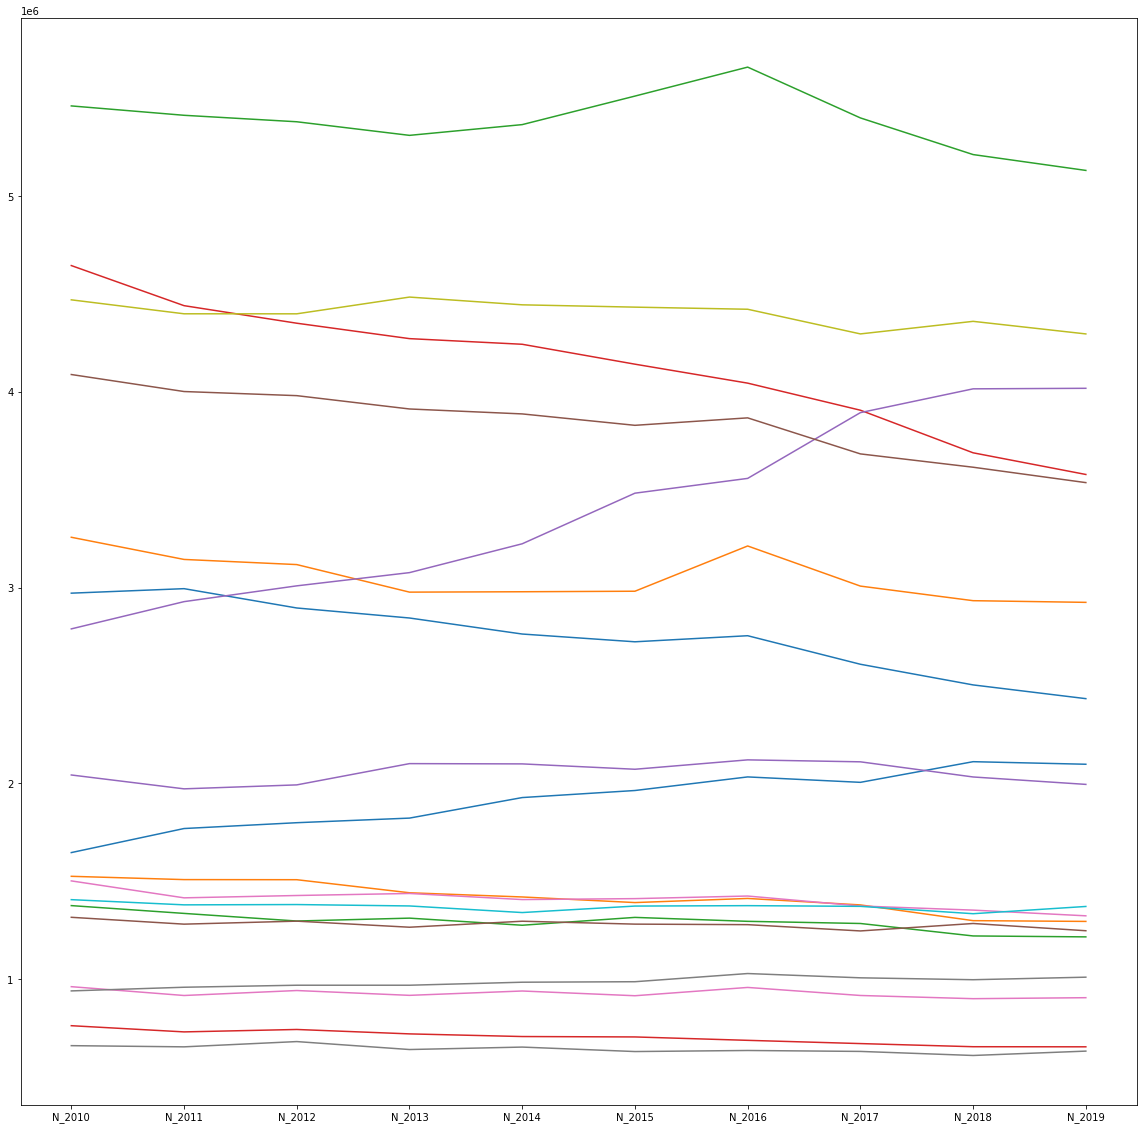

<Figure size 360x720 with 0 Axes>

In [170]:
fig_s = pylab.figure(figsize = (20,20))
figlegend_s = pylab.figure(figsize=(5,10))
ax_s = fig_s.add_subplot(111)
lines_s = ax_s.plot(df_scaled_1)
figlegend_s.legend(lines, ('Arab','Czech','Danish','Dutch',
                         'French Canadian','Greek','Hungarian','Lithuanian',
                         'Norwegian','Portuguese','Russian','Scotch-Irish','Scottish','Slovak',
                         'Subsaharan African','Swedish','Swiss','Ukrainian'), 'center')

figlegend_s.savefig('legend_s_1.png')
fig_s.savefig('graph_s_1.png')

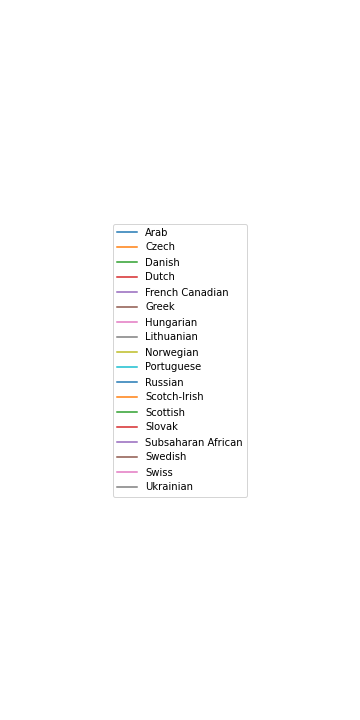

In [171]:
PATH = "/Users/Arnaud/Desktop/506_Project/Deliverable-2/"
#PATH = "/Users/luke/Documents/Code/CS506/Project/cs506-finalProject/Deliverable-2/"
Image(filename = PATH + "legend_s_1.png", width=500, height=500)

In [ ]:
### Deliverable 2 Ends Here #####

In [ ]:
### Testing a new method of getting ancestry data, goes back to 1980 ###

In [3]:
# agg_df = pd.read_csv("./data/aggregate-data/USA_Aggr_data.csv")
agg_df = pd.read_csv("/Volumes/My Passport for Mac/CS506/Project/data/USA_Aggr_data.csv")

In [4]:
agg_df

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,ANCESTR1,ANCESTR1D
0,2000,200004,1,NaN,600.0,2000000000014,17,1,1,618.0,26,261
1,2000,200004,1,NaN,600.0,2000000000014,17,1,2,684.0,32,321
2,2000,200004,2,NaN,600.0,2000000000024,48,1,1,618.0,940,9400
3,2000,200004,2,NaN,600.0,2000000000024,48,1,2,609.0,940,9400
4,2000,200004,2,NaN,600.0,2000000000024,48,1,3,621.0,940,9400
...,...,...,...,...,...,...,...,...,...,...,...,...
54042719,2020,202001,1193466,2.020001e+12,112.0,2020011934661,50056,1,5,103.0,22,220
54042720,2020,202001,1193466,2.020001e+12,112.0,2020011934661,50056,1,6,107.0,22,220
54042721,2020,202001,1193467,2.020001e+12,50.0,2020011934671,20056,1,1,50.0,999,9990
54042722,2020,202001,1193467,2.020001e+12,50.0,2020011934671,20056,1,2,53.0,940,9400


In [5]:
df_2000 = pd.DataFrame(agg_df.loc[agg_df['YEAR'] == 2000])

In [6]:
df_2000

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,ANCESTR1,ANCESTR1D
0,2000,200004,1,NaN,600.0,2000000000014,17,1,1,618.0,26,261
1,2000,200004,1,NaN,600.0,2000000000014,17,1,2,684.0,32,321
2,2000,200004,2,NaN,600.0,2000000000024,48,1,1,618.0,940,9400
3,2000,200004,2,NaN,600.0,2000000000024,48,1,2,609.0,940,9400
4,2000,200004,2,NaN,600.0,2000000000024,48,1,3,621.0,940,9400
...,...,...,...,...,...,...,...,...,...,...,...,...
371613,2000,200004,157985,NaN,600.0,2000001579854,12,1,2,606.0,50,500
371614,2000,200004,157985,NaN,600.0,2000001579854,12,1,3,494.0,51,511
371615,2000,200004,157986,NaN,600.0,2000001579864,6,1,1,556.0,21,210
371616,2000,200004,157986,NaN,600.0,2000001579864,6,1,2,600.0,50,500


In [7]:
df_2000.to_csv("2000.csv")